Please fill in your name and that of your teammate.

You: Albin Aliu

Teammate: Christoph Jutzet

# Introduction

Welcome to the third lab. There is much to go through today so we will keep extra concepts to a minimum. There is no new library introduced at this lecture as we will keep using `numpy` for the heavy lifting, `scikit-learn` for the algorithms, and `seaborn` plus `matplotlib` for plotting. Careful about reusing variable names in the notebook and computing cells out of order: frequent calls to `Kernel -> Restart and Run All` will save you from many bugs.

This assignment starts getting math-heavy. Here's a new tool to aid you with the debugging. Explicitly `import IPython` at the beginning of a notebook (or Python file) to have access to the computational Python kernel. You can then call `IPython.embed()` at an arbitrary place in your code (say, inside a loop) and it will pause the computation and drop you into an interactive console. You can then evaluate Python code in the context where it was called. Here is an example:

```python
import numpy as np
for i in range(10):
    guess = np.random.normal()
    function_that_fails_because_of(guess, i)
```

Let's say your function fails for `i==9`, how would you find the error? Typically you may want to edit the code and print `guess` and `i` to see what is happening, but it is slow and passive. What if you want to try to pass `i+1` and see if that works? What if you want to try a few other random numbers with the same `i`? Enter `IPython.embed()`:

```python
import numpy as np
import IPython
for i in range(10):
    guess = np.random.normal()
    if i==9: IPython.embed()
    function_that_fails_because_of(guess, i)
```

If you execute this code, the cell output will show an interactive console where you can try for example the following lines:

```python
i #=> prints value of i
guess  #=> prints value of guess
function_that_fails_because_of(guess, i) #=> fails and shows you the error
function_that_fails_because_of(guess, i+1) #=> execute a new call: will it work?
function_that_fails_because_of(guess, i-1) #=> what about this one?
guess = np.random.normal() #=> overwrites the value of `guess` in the kernel
function_that_fails_because_of(guess, i) #=> will this work this time?
```

As you can see you can test your code in the context of the function (or, here, loop), find the code that works, then you can go ahead and copy+paste in your actual code. If you need to exit the console and resume the computation (with whatever change you executed, as the kernel is the same) just type `exit()`.

_Bonus:_ you can ask the kernel to drop you into a _debugger_ session every time you get an error. This can be tricky with Jupyter Notebooks, so use with caution, but can also be a lifesaver if you are willing to learn about [postmortem debugging](https://medium.com/instamojo-matters/become-a-pdb-power-user-e3fc4e2774b2). You do that by adding the following lines on top of your code (need to execute them only once):

```python
# DEBUG: uncaught exceptions drop you into ipdb for postmortem debugging
import sys, IPython; sys.excepthook = IPython.core.ultratb.ColorTB(call_pdb=True)
```

After this line, if you encounter an error or uncaught exception in your code, rather than terminating you will be dropped in an `ipdb` (fancier version of `pdb`) console where you can interrogate the program about the conditions causing the crash.

Good hunting!

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 22 points (out of 33 available) to pass** (66%).

# 1. Fundamentals

Let's make sure some of the core points have sunk in before addressing the specific algorithms.
#### 1.1 **[1pt]** Write the equation of the Gaussian density. Use Latex inside the Markdown cell.
I suggest you type it out rather than copy+paste: the goal of this question is to force you to read one term at a time and understand what is clear and what is not. For example, the equation you will write here a norm, while our later applications of the formula do not, since we will actually be using the [Gaussian](https://en.wikipedia.org/wiki/Normal_distribution) Probability Density Function [(PDF)](https://en.wikipedia.org/wiki/Probability_density_function) equation instead.

$$
p(x) =  \frac{1}{\sqrt{2\pi\sigma}}\cdot exp\bigg(-\frac{\left\lVert x - \mu \right\rVert^2}{2\sigma^2}\bigg)
$$

#### 1.2 **[1pt]** Explain why we maximize the log-likelihood rather than the likelihood. In particular, why the $\log$ rather than another operation?

Because the likelihood is a **product** of many terms, which makes it mathematically difficult to solve for $x$. Thus we maximize the log-likelihood, since the log function does not change the relation of the points and we get a sum instead of a product, which makes it much easier to derivate later s.t. we can find the maximum. 

#### 1.3 **[1pt]** Why the equation maximizing the log-likelihood of a Gaussian does not include the parameter $\sigma$?
(in the slides it is mentioned as "dropped out of the equation")

It's dropped because it's independent of any variable (especially on $w$) and thus doesn't affect our maximization.

#### 1.4 **[1pt]** Explain the meaning of i.i.d. (in English), using the simplest words you can.

Each variable has the same probability distribution (e.g. Gaussian, Exponential, Poission, etc...) AND is independent of each other. 

#### 1.5 **[2pt]** Write the equation of the Bayes' Rule (use Latex). Then write below how to read it in English.

$$
p(y | x) = \frac{p(x|y)\;p(y)}{p(x)}
$$

Left: For two events $y$ and $x$ with $p(x)>0$, we calculate the probability of event $y$ happening under the condition that $x$ has happened. 

Right: The probability of $x$ happening under the condition that $y$ happened multiplied by the probability of $y$ happening and all of that divided by the probability of $x$ happening. 

# 2. Linear Regression

#### 2.1 **[2pt]** Explain the meaning of $y_i = \langle w, x_i \rangle + \epsilon_i, \;\; \epsilon \sim \mathcal{N}(0, \sigma^2)$ (in English). Utilize the word 'prototype'.

$y_i$ is the label we'd get through our linear model for some $x_i$ plus there's some noise added $\epsilon_i$, where $\epsilon_i$ is drawn from a Gaussian Distribution with $\mu = 0$ and some unknown parameter $\sigma^2$. We have that $y_k = \langle w, x_k \rangle$  is the prototype point, our "true" label and $y_i = \langle w, x_i \rangle + \epsilon_i$ is a noisy observation of the prototype point

Enough theory, let's get some coding. Since we are working with a regression task, let us generate some data from an underlying linear function with some noise.  
_[think: the process is (correct but) unnecessary convoluted, are you confident enough yet to simplify it?]_

In [0]:
import numpy as np
trg_fn = lambda x: 2*x - 1 # remember me?
some_noise = lambda: np.random.normal(0,2) # Gaussian noise with \mu=0, \sigma=2
# Below we add a 1 to every row as the bias (constant) input
data = np.array([[x, 1, trg_fn(x) + some_noise()] for x in np.linspace(-10, 10, 50)])
*x, y = data.transpose() # easier with splat and numpy
x = np.array(x).transpose() # data rows with data input and bias input

#### 2.2 **[1pt]** Write a (Python) function that takes a data point in input and returns the squared error Loss. Use it to compute the Risk over the data for model acting as a constant predictor $y = 1$.

In [3]:
error_loss = lambda x: (x - 1)**2

sum = 0
for yi in y:
  sum += error_loss(yi)



print('sum: '+str(sum))

sum: 7903.488344194876


[IMPORTANT]: A few tips before we proceed:
- Numpy's linear algebra library provides matrix inversion, but you should use the pseudo-inverse to cope with singular covariance matrices: `np.linalg.pinv()`
- Numpy's array provides inner product with the function `dot()`
- Typically `dot()` will find the right direction for one-dimensional arrays, which you should never need to transpose
- Using `dot()` with matrices instead always requires you to `transpose()` to the right orientation
- Remember that matrix product is not commutative: `A.dot(B)` is NOT equal to `B.dot(A)`. Refresh also how `A.dot(B)` requires the number of columns of `A` to be the same as the number of rows of `B`, and the result will have the same number of rows of `A` and the number of columns of `B`.
- Linear regression uses a closed-form solution, not a loop, and you will not use the implementation of the loss above (because it is implicit in the algorithm's solution).

#### 2.3 **[2pt]** Write a function that takes in input a list of data points and a list of labels, and returns the $w$ vector using the closed-form solution of Linear Regression.

In [0]:
#w = (XT X)^(−1)X^T y
def calc_w(x,y):

  XTX = x.transpose().dot(x)
  invXTX = np.linalg.pinv(XTX)
  XTy = x.transpose().dot(y)
  w = invXTX.dot(XTy)
  return w

calc_w(x,y)

array([ 1.94315535, -0.71102471])

#### 2.4 **[2pt]** Classify the data using your Linear Regression implementation. Print the pairs `(label, prediction)`, and the squared error Risk 
Remember you need to build the linear model (careful with the bias), then you are doing _regression_ not _classification_, which means you are predicting the value of $\hat{y}$ based on your $x$. You should get back $m$ and $q$ close to $2$ and $-1$, and the loss extremely low (even exact zero).

In [0]:


def lin_reg(x,y):
  #calculate w
  w = calc_w(x,y)


  #extract m and q, which will not be needed... scalar product ftw!
  m = w[0]
  q = w[1]

  list = []
  error_risk = 0

  for pt in zip(x,y):
    pred = np.dot(w, pt[0])
    loss = ((pt[1] - pred))**2
    error_risk += loss
    list.append((pt[1], pred))

  return (list, error_risk)

l, err = lin_reg(x,y)

print("squared error risk:")
print(err)
print("\nlist (label, prediction):")
l

squared error risk:
211.07837586609452

list (label, prediction):


[(-18.8527187174977, -20.14257821191408),
 (-14.562877905960923, -19.34945357927117),
 (-22.828060222502973, -18.556328946628263),
 (-17.499367924006588, -17.763204313985348),
 (-18.004948423680563, -16.970079681342437),
 (-18.937191101163865, -16.176955048699526),
 (-16.34510639786961, -15.383830416056616),
 (-13.716185236002094, -14.590705783413705),
 (-11.092523253469784, -13.797581150770794),
 (-13.05275555677865, -13.004456518127885),
 (-12.760906740016543, -12.211331885484974),
 (-12.325360325819696, -11.418207252842063),
 (-13.486751577211201, -10.625082620199152),
 (-5.271940514628387, -9.831957987556242),
 (-8.57440861306024, -9.038833354913331),
 (-8.992725561328694, -8.245708722270418),
 (-7.667492273931202, -7.452584089627509),
 (-8.145409456416834, -6.659459456984599),
 (-3.6599966155225787, -5.8663348243416875),
 (-5.768843264591231, -5.0732101916987755),
 (-5.315145491974773, -4.280085559055865),
 (-3.3227373002669216, -3.486960926412956),
 (0.9968505515392811, -2.693836

#### 2.5 **[2pt]** Plot the data and the model.
You should be able to reuse code from the last lab (particularly plot and params-to-boundary conversion), but feel free to customize it as needed. Sounds like repetition but it's not: careful with the bias! (Hint: You can plot the model's predictions using linear algebra with `x.dot(w)` instead of going through all the conversion.)

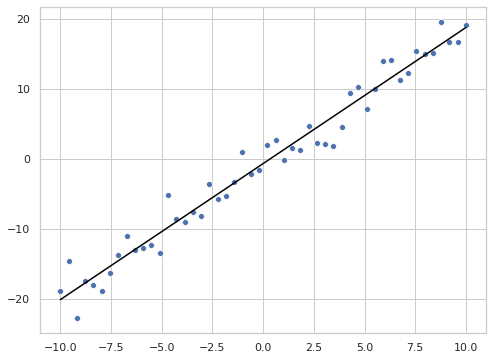

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

l, _ = lin_reg(x,y)
data_transposed = np.array(l).transpose()
labels = data_transposed[0]

sns.scatterplot(x.transpose()[0], labels)

w = calc_w(x,y)
sns.lineplot(x.transpose()[0], x.dot(w), color='black')



#### 2.6 **[2pt]** Find the linear regression in scikit-learn and train a model on the data.
The input to the `fit()` function should be a matrix and a vector, so try forcing `actual_x` into a $n\times 1$ matrix using `actual_x.reshape((-1, 1))`. If you want to predict the outputs, pass the same matrix to the method `predict()`.  

In [0]:
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

actual_x = x.transpose()[0].reshape((-1, 1));
# Train the model using the training sets
regr.fit(actual_x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 2.7 **[1pt]** Plot in a single figure (i) the data, with different colors for the two classes; (ii) the model you learned with your implementation of the Linear Regression; (iii) the model you learned with the scikit-implementation.
If you plot both predicted functions and you only see one, verify if they are exactly the same and are just being superimposed.

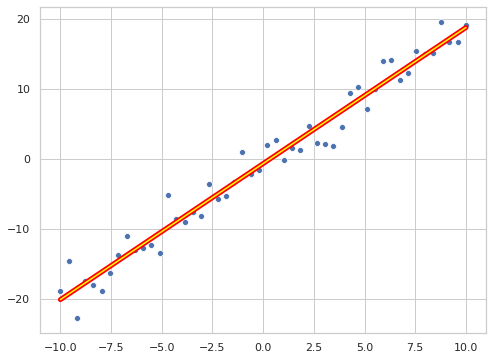

In [0]:
w = calc_w(x,y)

inputs = x.transpose()[0]

#scatter plot
l, _ = lin_reg(x,y)
data_transposed = np.array(l).transpose()
labels = data_transposed[0]

sns.scatterplot(inputs, labels)


#my model in RED
sns.lineplot(inputs, x.dot(w), color='red', lw=5)

#scikit model in YELLOW
scikit_pred = regr.predict(actual_x)
sns.lineplot(inputs, scikit_pred, color='yellow')


# 3. Linear Discriminant Analysis

For binary classification, let's load the iris dataset once again for this exercise, and carefully selecting the data for an easy binary classification problem (for now). Notice we are not using classes ${-1, +1}$ anymore because we will not use the Margin here. 

In [0]:
import numpy as np
from sklearn.datasets import load_iris
iris_x, iris_y = load_iris(True) # print these to understand
x1 = np.array([r[0] for r in iris_x]) # first feature
x2 = np.array([r[2] for r in iris_x]) # third feature

# x = np.array([x1, x2, b]).transpose() # numpy gives us transpose() for free
x = np.array([x1, x2]).transpose() # numpy gives us transpose() for free
# Reduce the three classes into two for binary classification {1, 2}
y = np.array([1 if y in [1,2] else 2 for y in iris_y])


To solve LDA we need to find the parametrization $\theta_y=(\mu_y, \Sigma, \pi_y)$. Since $\mu$ and $\pi$ are class-dependent, we need to first split the input data depending on which class it belongs to.

#### 3.1 **[1pt]** Write a (Python) function that takes a dataset (inputs and labels) in input and returns a dictionary hashing each of the $m$ classes to the a list of the points belonging to that class. We will call this `partition` in the next questions.

Know that the method `dict.get()` returns a default value (such as an empty list...) if the key is not found in the dictionary.

In [0]:

def partition(inputs, labels):
  dictionary = {}
  for pt in zip(inputs, labels):

    #if classes not already in dictionary, create new empty list
    if(pt[1] not in dictionary):
      dictionary[pt[1]] = []
    
    #now put the input into the class list
    dictionary[pt[1]].append(pt[0])
  
  return dictionary


partition(x,y)

{1: [array([7. , 4.7]),
  array([6.4, 4.5]),
  array([6.9, 4.9]),
  array([5.5, 4. ]),
  array([6.5, 4.6]),
  array([5.7, 4.5]),
  array([6.3, 4.7]),
  array([4.9, 3.3]),
  array([6.6, 4.6]),
  array([5.2, 3.9]),
  array([5. , 3.5]),
  array([5.9, 4.2]),
  array([6., 4.]),
  array([6.1, 4.7]),
  array([5.6, 3.6]),
  array([6.7, 4.4]),
  array([5.6, 4.5]),
  array([5.8, 4.1]),
  array([6.2, 4.5]),
  array([5.6, 3.9]),
  array([5.9, 4.8]),
  array([6.1, 4. ]),
  array([6.3, 4.9]),
  array([6.1, 4.7]),
  array([6.4, 4.3]),
  array([6.6, 4.4]),
  array([6.8, 4.8]),
  array([6.7, 5. ]),
  array([6. , 4.5]),
  array([5.7, 3.5]),
  array([5.5, 3.8]),
  array([5.5, 3.7]),
  array([5.8, 3.9]),
  array([6. , 5.1]),
  array([5.4, 4.5]),
  array([6. , 4.5]),
  array([6.7, 4.7]),
  array([6.3, 4.4]),
  array([5.6, 4.1]),
  array([5.5, 4. ]),
  array([5.5, 4.4]),
  array([6.1, 4.6]),
  array([5.8, 4. ]),
  array([5. , 3.3]),
  array([5.6, 4.2]),
  array([5.7, 4.2]),
  array([5.7, 4.2]),
  array([6.2

#### 3.2 **[1pt]** Write a function that takes the `partition` in input and returns a dictionary hashing each class to its corresponding prototype $\mu_y$.

In [0]:
def my(partition):
  dictionary = {}
  for cl, pts in partition.items():
    myval = np.array([0]*len(pts[0]))
    for pt in pts:
      myval = myval + np.array(pt)
    myval = (1/len(pts))*myval
    dictionary[cl] = myval

  return dictionary


my(partition(x,y))


{1: array([6.262, 4.906]), 2: array([5.006, 1.462])}

#### 3.3 **[1pt]** Write a function that takes the `partition` in input and returns a dictionary hashing each class to its corresponding prototype $\pi_y$.

In [0]:
def pi(partition):
  dictionary = {}

  #our var to add together the sum of the lenght of all classes
  n=0

  #first just set the length of every class
  for cl, pts in partition.items():
    length_of_class = len(pts)
    dictionary[cl] = length_of_class
    n += length_of_class
  
  #divide
  for x in dictionary:
    dictionary[x] = dictionary[x] / n

  return dictionary

pi(partition(x,y))

{1: 0.6666666666666666, 2: 0.3333333333333333}

#### 3.4 **[4pt]** Write a function that takes the `partition` in input and the class-wise center estimates (the means from above) and returns the corresponding $\Sigma$ (one for all classes and all inputs).
You may need `np.concatenate()` to join the $x_i - \hat{\mu}_{y_i}$ from each class. Print the shape to verify if your linear algebra is on point: the covariance matrix between all inputs should have as many rows (and columns) as the number of features (hint: that's 2). You can see the size of each dimension in a numpy array with `var.shape` (property not method): `assert sigma.shape == (2,2)`.

In [0]:
#sigma 

def cov_matr(partitions, mys):
  
  dictionary = {}

  #dimension of matrix dim x dim
  dim = 2

  #sigma here? 
  sigma = np.array([[0]*dim]*dim)

  for cl, pts in partitions.items():

    # OPT2
    #init sigma as 0 matrix
#    sigma = np.array([[0]*dim]*dim)

    #iterate over points
    for pt in pts:
      #calculations
      x_y = (np.array(pt) - np.array(mys[cl]))
      sigma = sigma + np.outer(x_y, x_y)
    
    #check size
    assert sigma.shape == (dim,dim)
    


    # OPT2
    # dictionary[cl] = sigma
  
  n = len(partitions[1]) + len(partitions[2])
  #divide by 1/n
  sigma = sigma* (1/n)

  return sigma

part = partition(x,y)
mys = my(part)

cov_matr(part, mys)

array([[0.33055867, 0.30456133],
       [0.30456133, 0.45969467]])

#### 3.5 **[5pt]** Write the function for the decision boundary of LDA $f(x)$.

You can find the logarithm in the math module: `from math import log`. You need to implement the equations for $w$ and $q$: this cell will be very math heavy but you should be able to get it in few lines. Remember to check for the shape of $w$ and $b$ to verify if your matrix products are computed the right way. You want $w$ to be of length 2, and $b$ is a scalar.

In [0]:
from math import log

def lda(pt):

  #prep data
  part = partition(x,y)
  mys = my(part)
  pis = pi(part)
  covm = cov_matr(part, mys)
  covminv = np.linalg.pinv(covm)
  
  
  w = np.dot(
      covminv, #sigma^-1
      mys[1] - mys[2] # my1-my2
  )

  b = (
      0.5 * np.dot(mys[2], covminv).dot(mys[2]) -
       0.5 * np.dot(mys[1], covminv).dot(mys[1]) +
        log(pis[1]) -
          log(pis[2])
  )

  #assertions..
  assert len(w) == 2
  assert isinstance(b, float) == True

  #global vars
  global gl_w
  global gl_b
  gl_w = w
  gl_b = b

  return np.dot(pt,w) + b > 0

lda([5,6])

True

#### 3.6 **[2pt]** Plot the LDA decision boundary on top of the data.

Notice that we are using different data from Linear Regression, and that our model now generated $w$ and $b$ separately, so you will need to adapt the plotting functions -- or trust me it's quicker to just rewrite them. Plotting is one of the few applications where generalizing your code just makes for a stunted replica of the original interface, which itself is pretty solid, so just use it directly if you can. Also we had pretty solid plotting for classification problems in the last exercise.  
Remember you have code that converts from $w$ and $b$ to $m$ and $q$ from the last assignment if you want to generate the model's points that way (you will need to copy+paste it here).

In [0]:
def wb2mq(w, b):
    assert len(w) == 2, "This implementation only works in 2D"
    assert w[0] != 0 and w[1] != 0 and b != 0 # simplify
    return [w[0]/-w[1], b/-w[1]] # m and q

def params2boundary(w, b):
    m, q = wb2mq(w, b)
    return lambda x: m*x + q

print(f"w: {gl_w}, b: {gl_b}")


w: [-7.96528842 12.76916894], b: 4.912548207950989


My LDA parameters: (black line)
w: [-7.96528842 12.76916894], b: 4.912548207950989 | m: 0.6237906674023647, q: -0.3847194935007224 
------------
sklearn parameters: (red line)
w: [  7.96528842 -12.76916894], b: -4.91254820795092 | m: 0.623790667402364, q: -0.38471949350071727 


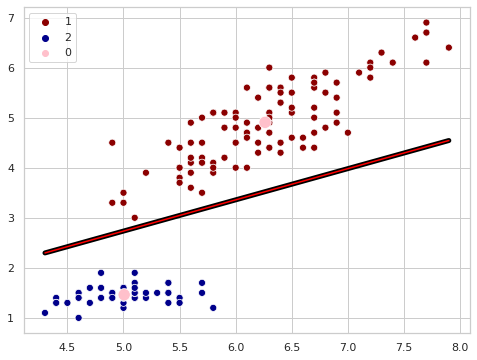

In [0]:
#plot data
sns.scatterplot(x1, x2,
  hue=y, # let's use different colors for the two classes
  palette=sns.color_palette(['darkred', 'darkblue']),
  s=50)


#plot prototype points
mys = my(part)
mysx = [mys[1][0],mys[2][0]]
mysy = [mys[1][1],mys[2][1]]

sns.scatterplot(mysx, mysy,
  hue=[0]*2, 
  palette=sns.color_palette(['pink']),
  s=150)


#plot line
m,q = wb2mq(gl_w, gl_b)
lda_boundary = params2boundary(gl_w, gl_b)
print("My LDA parameters: (black line)")
print(f"w: {gl_w}, b: {gl_b} | m: {m}, q: {q} ")
sns.lineplot(x1, [lda_boundary(inp) for inp in x1], color='black', lw=5)

print("------------")

try:
  #plot sklda line
  print("sklearn parameters: (red line)")
  sk_w,sk_b = sk_lda()
  sk_m,sk_q = wb2mq(sk_w, sk_b)
  sk_lda_boundary = params2boundary(sk_w, sk_b)
  print(f"w: {sk_w}, b: {sk_b} | m: {sk_m}, q: {sk_q} ")
  sns.lineplot(x1, [sk_lda_boundary(inp) for inp in x1], color='red')
except:
  print("/!\ Please run the cell below to also add the sklearn line and then rerun this cell")

#### 3.7 **[1pt]** Find LDA on scikit-learn; train a model on the data and add it to the print above (data + model from your implementation).

Pass the correct `solver` parameter to the constructor. If you do not, the result should still look exactly the same as your implementation nonetheless because the data is linearly separable, but you should be aware of the techniques you are using (and we have not gotten to SVD yet).  
Remember to make sure you can distinguish the two boundaries even if they overlap (e.g. use different colors). If you use our conversions from last exercise you should also see the printed values of $m$ and $q$ and they are likely to differ in the least significant digits even though the graph looks the same.  
Also LDA is a multiclass method and so you will need to access the coefficients of the _first_ (and here, only) boundary using `[trained_model.coef_[0], trained_model.intercept_[0]]`.

In [0]:
def sk_lda():
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

  clf = LinearDiscriminantAnalysis(solver='lsqr')
  clf.fit(x, y)

  return [clf.coef_[0], clf.intercept_[0]]

sk_lda()

[array([  7.96528842, -12.76916894]), -4.91254820795092]

## At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

Let's see some multiclass classification. Copy the code loading the Iris dataset, you want to extract the same features (so you can plot in 2D), but keep the three classes.  
_[think: does it matter what label does each class have? Could you use e.g. `['a', 'b', 'c']`?]_ 
Then run the scikit-learn LDA on the data to obtain a trained model. At this point you can open up the trained coefficients again, and rather than taking only the first like you did with `[trained.coef_[0], trained.intercept_[0]]`, you should have TWO $w$ vectors and two $b$ constants. These correspond to two decision boundaries used to separate the space in three classes.  
_[think: the space is actually separated in 4. Can you think of a decision tree on top of the boundaries to do the classification as the number of boundaries grow?]_

#### BONUS **[ZERO pt]** Plot the two boundaries classifying the three species of Iris in the dataset based on the two features used so far.

### Final considerations

Stop for a moment and think how hard it was to derive these equations (in the lecture), and how hard it was instead to implement them. These are two very different skills. For the derivation you need to think hard, express your concept in math (itself requiring broad knowledge of many of its fields), see it through with absolute precision, and finally correctly solve the equations. To implement the method, you need to map the math to the correct function calls (hard, but arguably less), and you only ever work with the final solution. This is the reason why so many people nowadays broadly advertise machine learning skills after taking short tutorials.  
The reason why you are sweating so much more on this course is to gain an edge over those who only ever learn to _use_ the tools: by instead _making_ the tools you understand them from the inside out, their applications and limitations, and even become capable of adapting and improving them. Keep up, this course is not easy, but machine learning has become unavoidable, and these foundations will enable you to bend the whole field to your needs.